In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

In [18]:
# Load the datasets
url = 'https://raw.githubusercontent.com/yazan19991/Algorithms-in-networks/main/data/50000.csv'
response = requests.get(url)
response.raise_for_status()
reviews_data = pd.read_csv(BytesIO(response.content))


In [ ]:
# Load the datasets
url = 'https://media.githubusercontent.com/media/yazan19991/Algorithms-in-networks/main/data/books_data.csv'
response = requests.get(url)
response.raise_for_status()
books_data = pd.read_csv(BytesIO(response.content))


In [19]:
# Load the datasets
#books_data = pd.read_csv('books_data.csv')
#reviews_data = pd.read_csv('50000.csv')

In [20]:
# Data Cleaning
books_data.drop_duplicates(inplace=True)
reviews_data.drop_duplicates(inplace=True)
books_data.dropna(inplace=True)
reviews_data.dropna(inplace=True)

# Merge the datasets on the 'Title' column
merged_data = pd.merge(books_data, reviews_data, on='Title', how='inner')

# Feature Engineering
merged_data['num_authors'] = merged_data['authors'].apply(lambda x: len(eval(x)))
merged_data['description_length'] = merged_data['description'].apply(lambda x: len(str(x)))

# Exploratory Data Analysis (EDA)

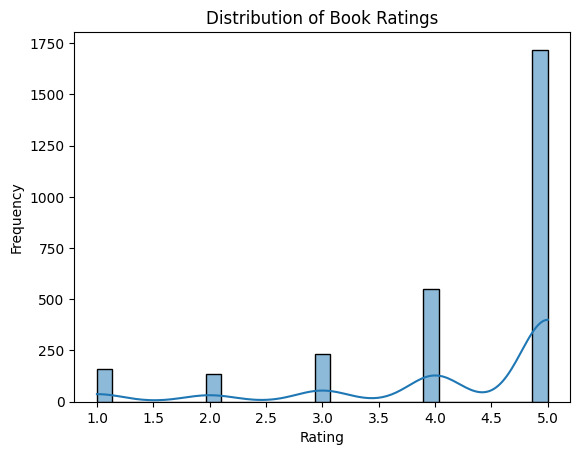

In [21]:
# Distribution of ratings
sns.histplot(merged_data['review/score'], kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig("Distribution_of_book_ratings.png")
plt.show()

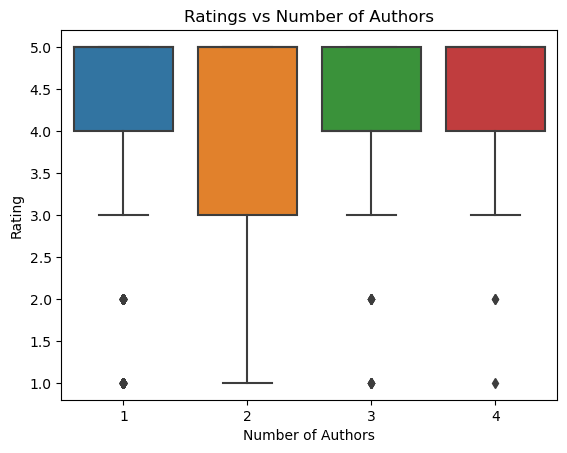

In [ ]:
# Analyze relationship between ratings and number of authors
sns.boxplot(x='num_authors', y='review/score', data=merged_data)
plt.title('Ratings vs Number of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Rating')
plt.savefig("Ratings_vs_authors.png")
plt.show()

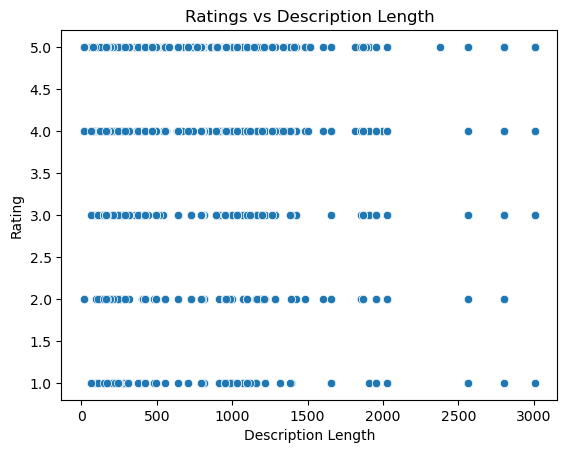

In [ ]:
# Analyze relationship between ratings and description length
sns.scatterplot(x='description_length', y='review/score', data=merged_data)
plt.title('Ratings vs Description Length')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.savefig("Ratings_vs_Description_Length.png")
plt.show()

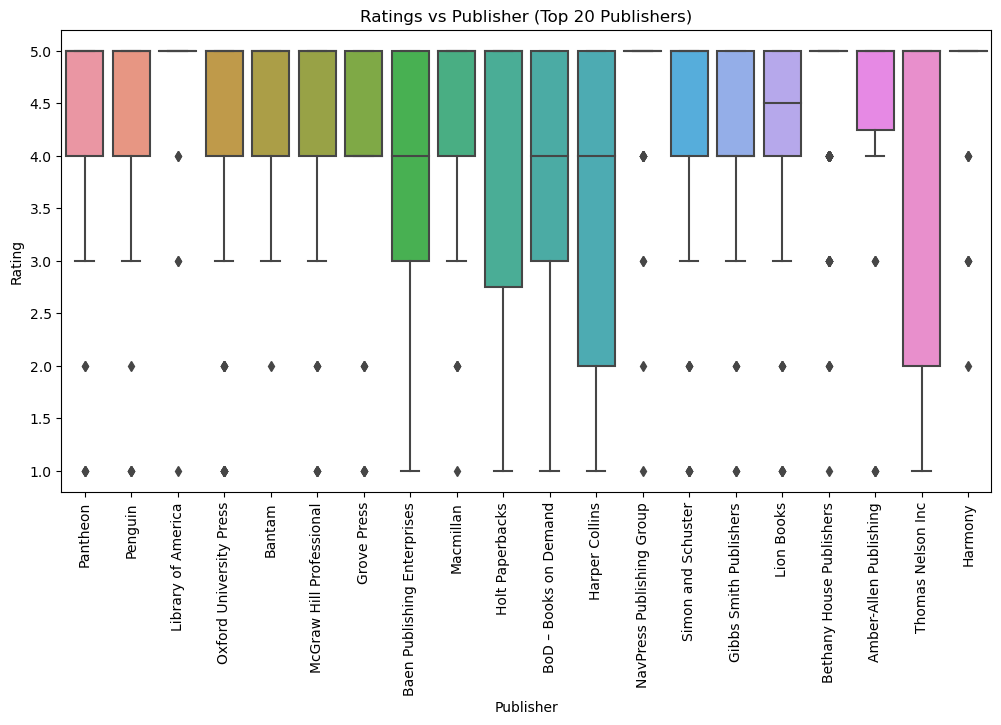

In [ ]:
# Analyze relationship between ratings and publisher
top_publishers = merged_data['publisher'].value_counts().head(20).index
filtered_data = merged_data[merged_data['publisher'].isin(top_publishers)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='publisher', y='review/score', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Ratings vs Publisher (Top 20 Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Rating')
plt.savefig("Ratings_Vs_top20_publishers.png")
plt.show()

In [ ]:
# Community Detection using Girvan-Newman Algorithm

# Create a graph where each book is a node and edges represent common publishers, authors, or categories
G = nx.Graph()

In [ ]:
# Add nodes
for index, row in merged_data.iterrows():
    G.add_node(row['Title'], rating=row['review/score'])

In [ ]:
# Add edges based on shared features (publisher, authors, categories)
for feature in ['publisher', 'authors', 'categories']:
    for group_key, group in merged_data.groupby(feature):
        titles = group['Title'].values
        for i in range(len(titles)):
            for j in range(i + 1, len(titles)):
                G.add_edge(titles[i], titles[j], weight=1)

In [ ]:
# Apply Girvan-Newman algorithm
comp = nx.community.girvan_newman(G)
top_level_communities = next(comp)
sorted(map(sorted, top_level_communities))

[["'night, Mother: A Play (Mermaid Dramabook)",
  '103 Great Poems: A Dual-Language Book (Dover Dual Language German) (German and English Edition)',
  'A History of Greek Philosophy: Volume 2, The Presocratic Tradition from Parmenides to Democritus',
  "A Kids' Guide to Building Forts",
  'A Recursive Vision: Ecological Understanding and Gregory Bateson',
  'A Rip in Heaven: A Memoir of Murder And Its Aftermath',
  'Aiding and Abetting: A Novel',
  'Altazor (Wesleyan Poetry Series)',
  "An Antebellum Plantation Household: Including the South Carolina Low Country Receipts and Remedies of Emily Wharton Sinkler with Eighty-Two Newly Dis (Women's Diaries and Letters of the South)",
  'Baffling Whodunit Puzzles: Dr. Quicksolve Mini-Mysteries',
  'Basic Arabic Workbook: For Revision and Practice',
  'Bear Hug: A Tom Bethany Mystery',
  "Beginner's Yoruba (Hippocrene Beginner's Series)",
  'Bette (Women of Ivy Manor Series #2)',
  'Bighorse the Warrior',
  'Bitter Grounds: A Novel',
  'Booste

In [ ]:
# Calculate Modularity
modularity = nx.community.modularity(G, top_level_communities)
print(f"Modularity of detected communities: {modularity}")

Modularity of detected communities: 0.28658563438587226


Community 0: Size=13, Avg Rating=4.77
Community 1: Size=121, Avg Rating=3.93
Community 2: Size=1, Avg Rating=4.00
Community 3: Size=1, Avg Rating=4.00
Community 4: Size=3, Avg Rating=4.67
Community 5: Size=1, Avg Rating=5.00
Community 6: Size=1, Avg Rating=2.00
Community 7: Size=1, Avg Rating=5.00
Community 8: Size=2, Avg Rating=4.50
Community 9: Size=3, Avg Rating=3.33
Community 10: Size=1, Avg Rating=3.00
Community 11: Size=2, Avg Rating=4.50
Community 12: Size=5, Avg Rating=3.80
Community 13: Size=1, Avg Rating=5.00
Community 14: Size=2, Avg Rating=3.50
Community 15: Size=1, Avg Rating=5.00


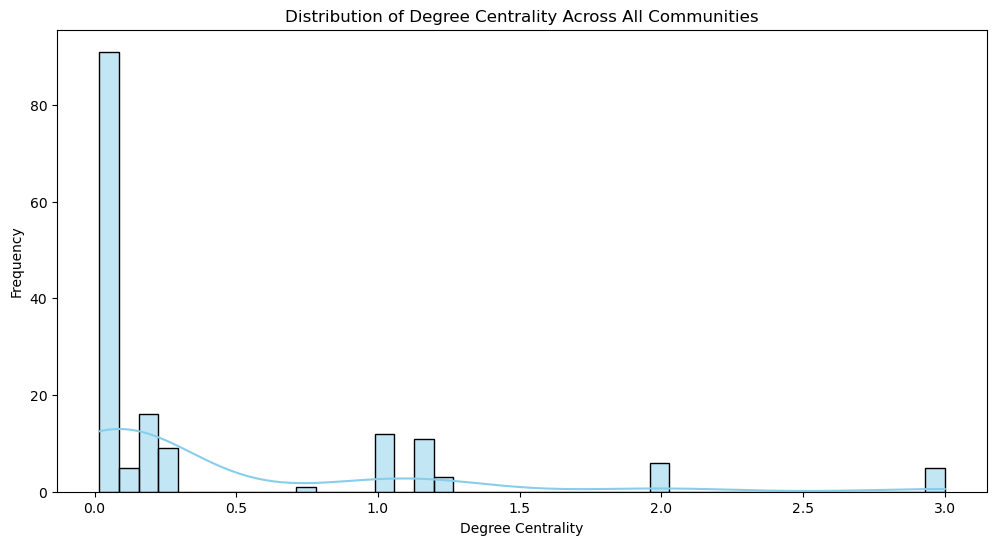

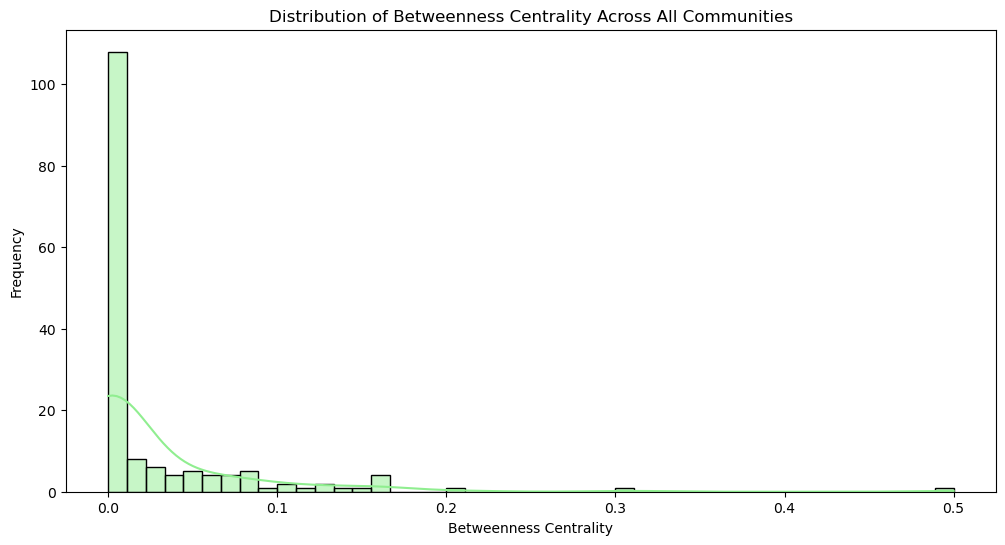

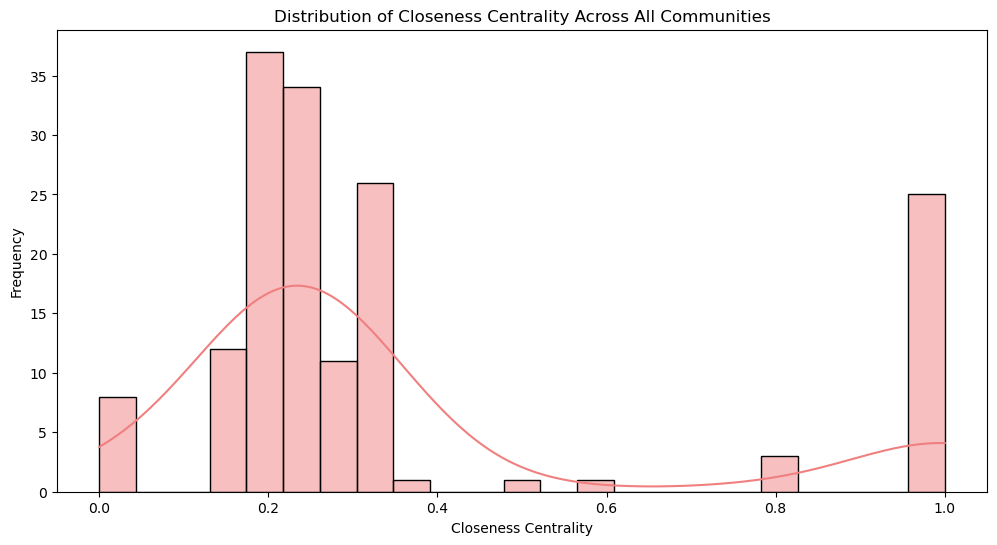

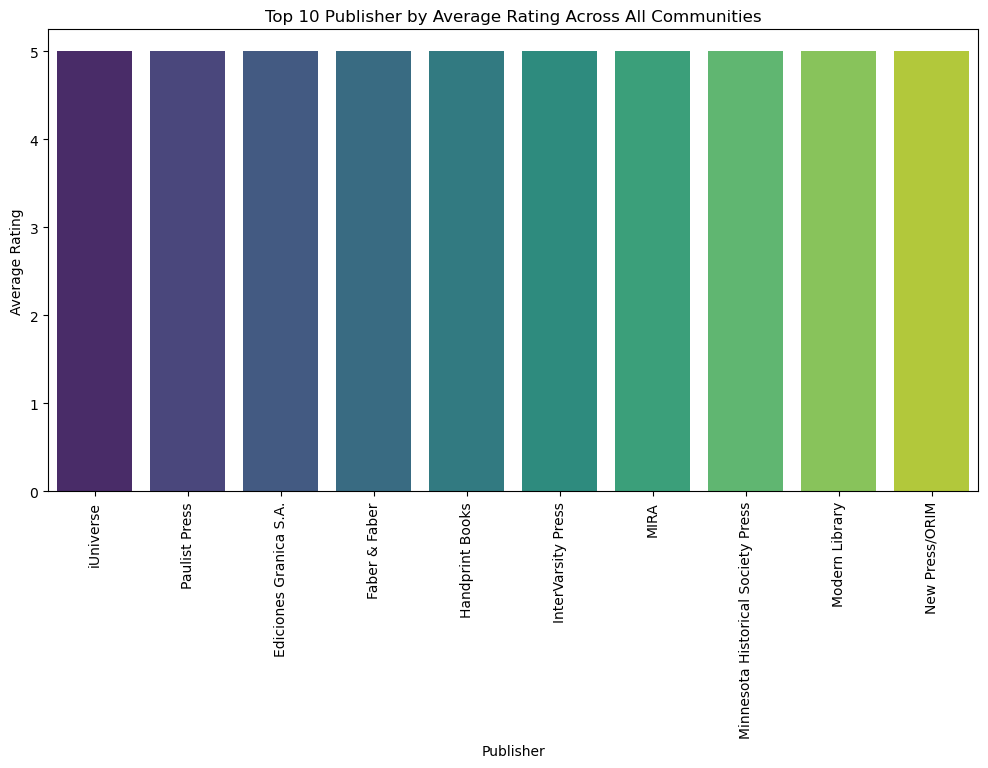

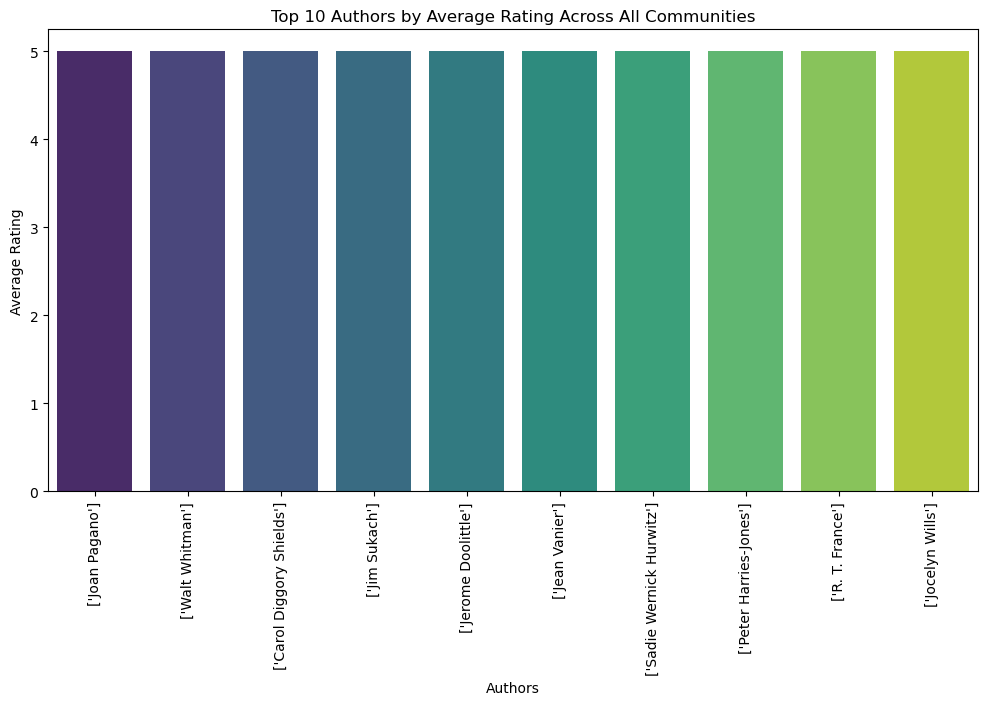

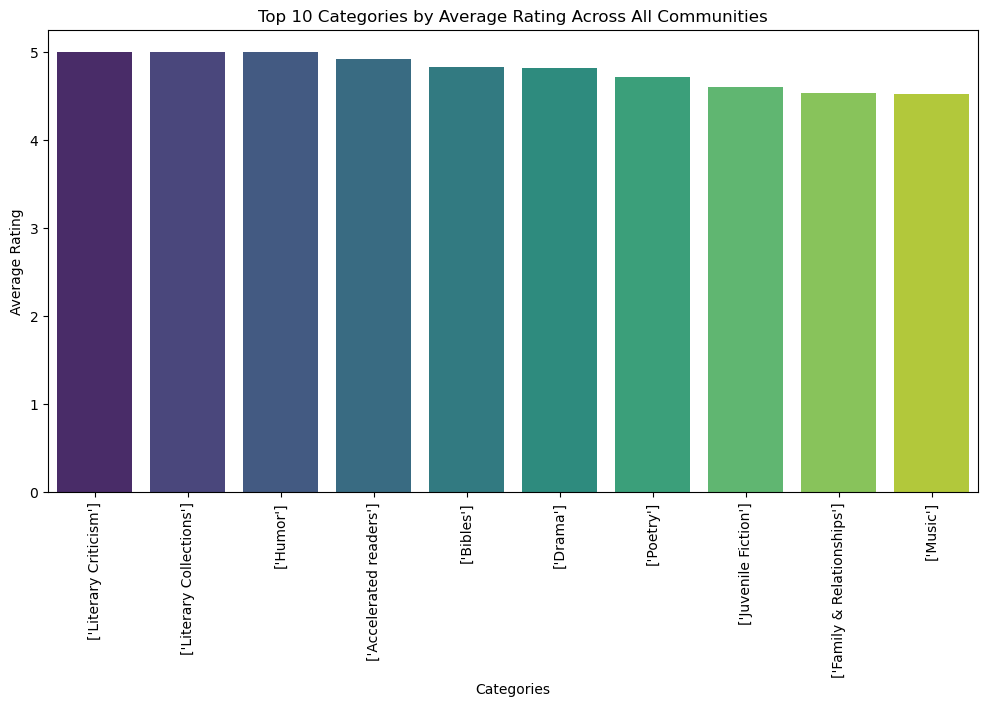

In [ ]:
# Aggregated results storage
combined_centrality = {
    'Degree': [],
    'Betweenness': [],
    'Closeness': []
}
combined_features = {
    'publisher': [],
    'authors': [],
    'categories': []
}

# Analyze communities and aggregate results
for i, community in enumerate(top_level_communities):
    subgraph = G.subgraph(community)
    avg_rating = np.mean([G.nodes[node]['rating'] for node in community])
    print(f"Community {i}: Size={len(community)}, Avg Rating={avg_rating:.2f}")

    # Centrality measures within community
    community_degree_centrality = nx.degree_centrality(subgraph)
    community_betweenness_centrality = nx.betweenness_centrality(subgraph)
    community_closeness_centrality = nx.closeness_centrality(subgraph)

    # Aggregate centrality results
    combined_centrality['Degree'].extend(community_degree_centrality.values())
    combined_centrality['Betweenness'].extend(community_betweenness_centrality.values())
    combined_centrality['Closeness'].extend(community_closeness_centrality.values())

    # Feature impact within community
    for feature in ['publisher', 'authors', 'categories']:
        feature_avg_rating = merged_data[merged_data['Title'].isin(community)].groupby(feature)['review/score'].mean()
        feature_data = feature_avg_rating.reset_index().rename(columns={'review/score': 'avg_rating'})
        combined_features[feature].append(feature_data)

# Combine feature data for all communities
for feature in combined_features:
    combined_features[feature] = pd.concat(combined_features[feature]).groupby(feature).mean().reset_index()

# Plot aggregated centrality measures
plt.figure(figsize=(12, 6))
sns.histplot(combined_centrality['Degree'], kde=True, color='skyblue')
plt.title('Distribution of Degree Centrality Across All Communities')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.savefig('Degree_Centrality_Distribution.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(combined_centrality['Betweenness'], kde=True, color='lightgreen')
plt.title('Distribution of Betweenness Centrality Across All Communities')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.savefig('Betweenness_Centrality_Distribution.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(combined_centrality['Closeness'], kde=True, color='lightcoral')
plt.title('Distribution of Closeness Centrality Across All Communities')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.savefig('Closeness_Centrality_Distribution.png')
plt.show()

# Plot aggregated feature impacts (top 10 for readability)
for feature, df in combined_features.items():
    top_feature = df.sort_values('avg_rating', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_feature[feature], y=top_feature['avg_rating'], palette='viridis')
    plt.title(f'Top 10 {feature.capitalize()} by Average Rating Across All Communities')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Average Rating')
    plt.xticks(rotation=90)
    plt.savefig(f'Top_10_{feature.capitalize()}_Average_Rating.png')
    plt.show()


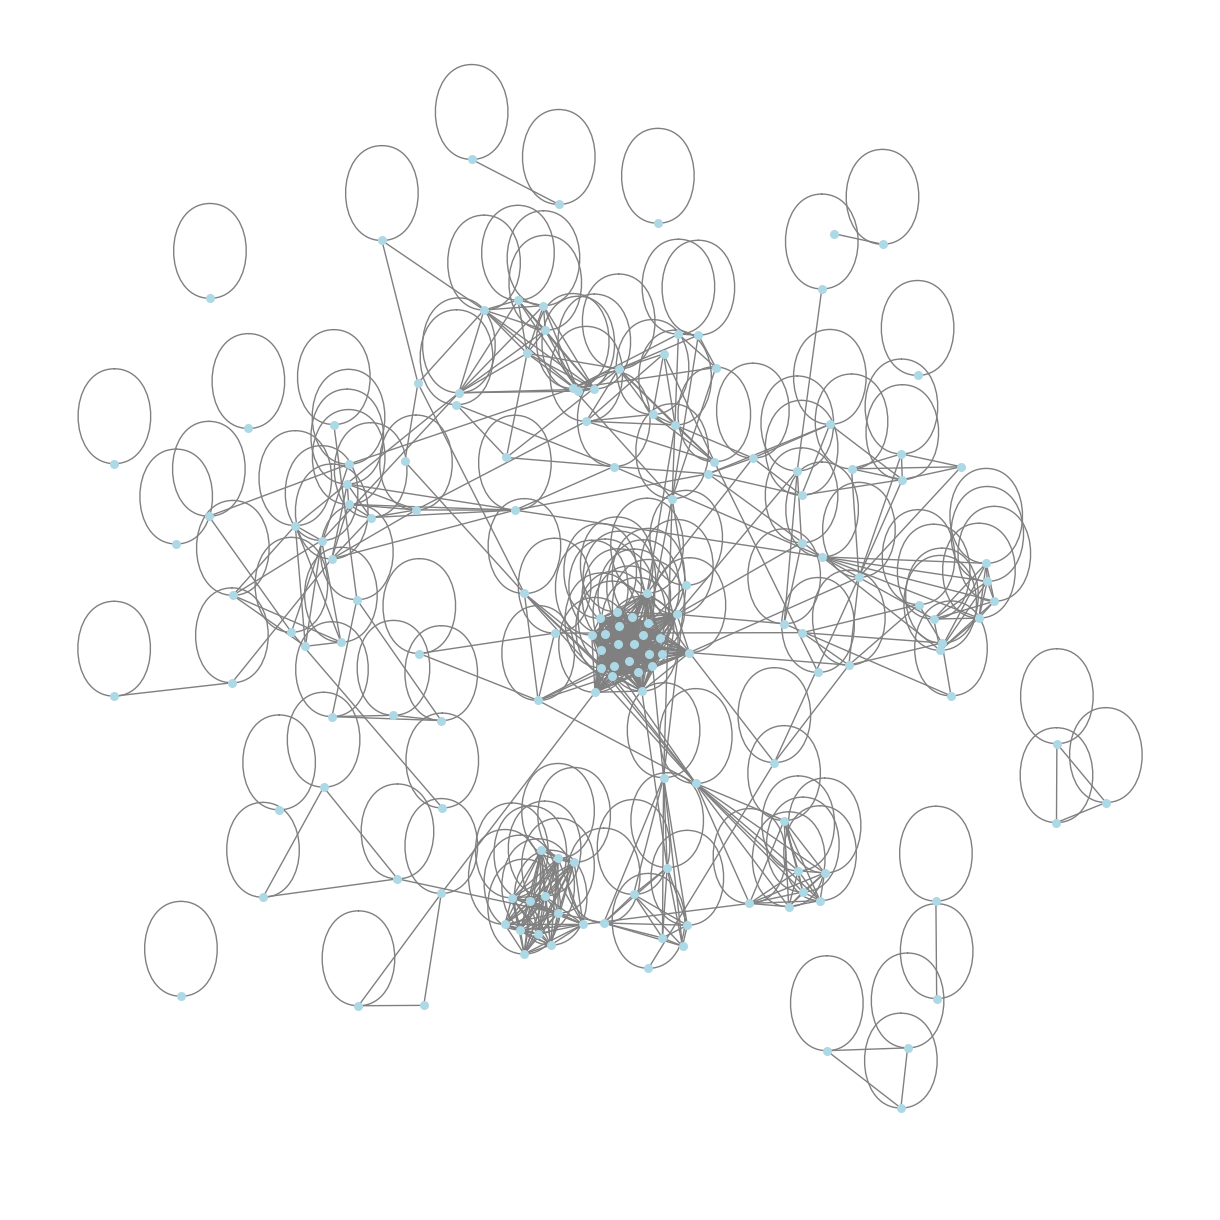

In [ ]:
# Plotting the communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Adjusted layout
nx.draw(G, pos, node_color='lightblue', with_labels=False, node_size=30, edge_color='gray')

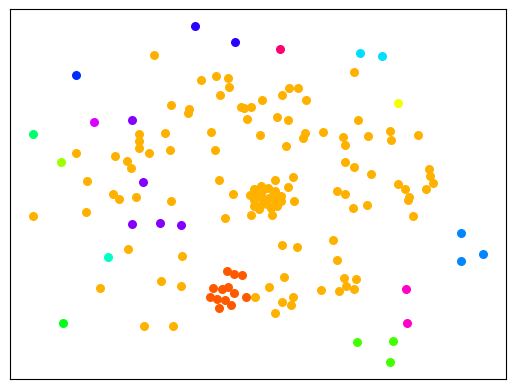

In [ ]:
# Assign colors to communities
colors = sns.color_palette('hsv', len(top_level_communities)).as_hex()
for i, community in enumerate(top_level_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i], node_size=30)

plt.show()

In [ ]:
# Centrality Measures

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 books by Degree Centrality:")
print(sorted_degree[:10])

Top 10 books by Degree Centrality:
[("Heartwood: Trickster's Game #1", 0.18354430379746836), ('Mr. Timothy : A Novel (P.S.)', 0.18354430379746836), ('Joshua and the Children', 0.18354430379746836), ('Suture Self (Bed-And-Breakfast Mysteries)', 0.18354430379746836), ('The Barracks Thief', 0.18354430379746836), ('King of the Dead', 0.18354430379746836), ('Lady Into Fox', 0.17721518987341772), ("The Year Is '42: A Novel", 0.17088607594936708), ('Gods and Kings (Chronicles of the Kings #1)', 0.17088607594936708), ('Bitter Grounds: A Novel', 0.16455696202531644)]


In [ ]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 books by Betweenness Centrality:")
print(sorted_betweenness[:10])

Top 10 books by Betweenness Centrality:
[('Lady Into Fox', 0.20744146001543404), ("The Secret Architecture of Our Nation's Capital: The Masons and the Building of Washington, D.C.", 0.18221398048859147), ("Heartwood: Trickster's Game #1", 0.1362976699185681), ('Good Faith and Truthful Ignorance: A Case of Transatlantic Bigamy', 0.12577602193017817), ('Dispatches from the Front: Theological Engagements with the Secular', 0.11706845118116585), ('103 Great Poems: A Dual-Language Book (Dover Dual Language German) (German and English Edition)', 0.10786676034599921), ('The Principle of Relativity (Dover Books on Physics)', 0.10346661521982009), ('Latin for Beginners (Language Guides)', 0.10119229986600776), ('Brief Guide to Ideas, A', 0.0958060261918199), ('A History of Greek Philosophy: Volume 2, The Presocratic Tradition from Parmenides to Democritus', 0.08282529572338486)]


In [ ]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 books by Closeness Centrality:")
print(sorted_closeness[:10])

Top 10 books by Closeness Centrality:
[('Lady Into Fox', 0.27988924050632913), ('Mr. Timothy : A Novel (P.S.)', 0.279191262350453), ('Suture Self (Bed-And-Breakfast Mysteries)', 0.279191262350453), ('The Barracks Thief', 0.279191262350453), ("Heartwood: Trickster's Game #1", 0.26529785829983804), ('Joshua and the Children', 0.2603620841919341), ('Gods and Kings (Chronicles of the Kings #1)', 0.25915670417252695), ('King of the Dead', 0.2567791197305772), ("The Year Is '42: A Novel", 0.2556066123345472), ('Dead Sexy', 0.2538677918424754)]


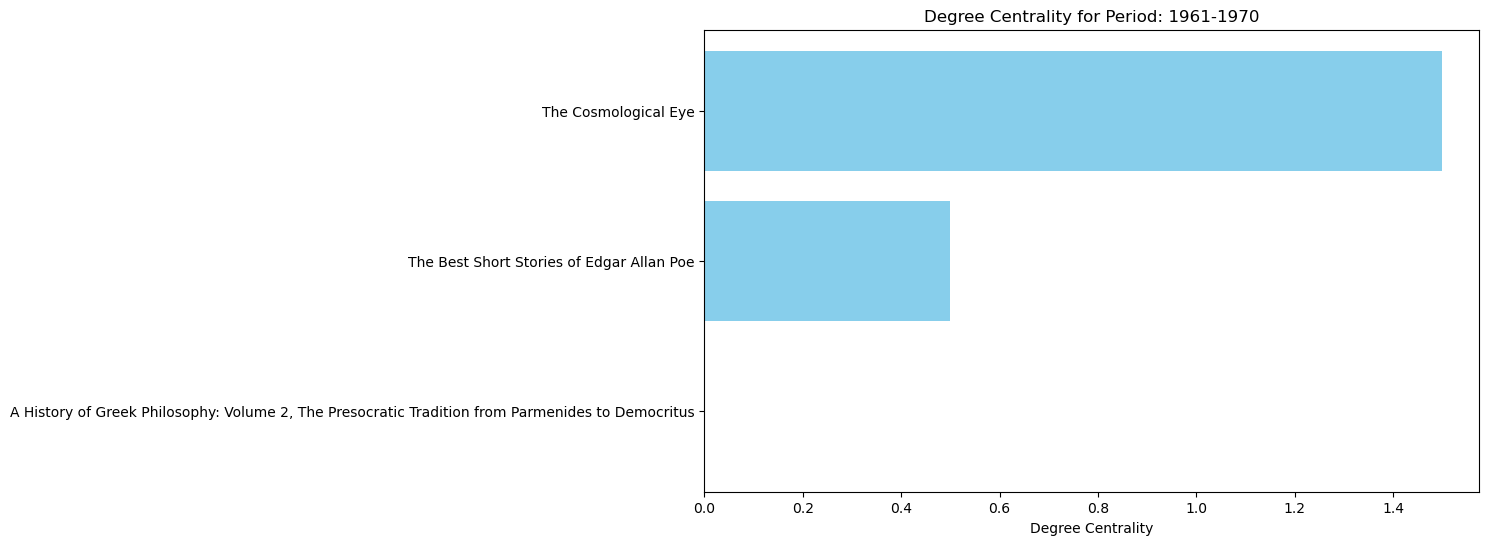

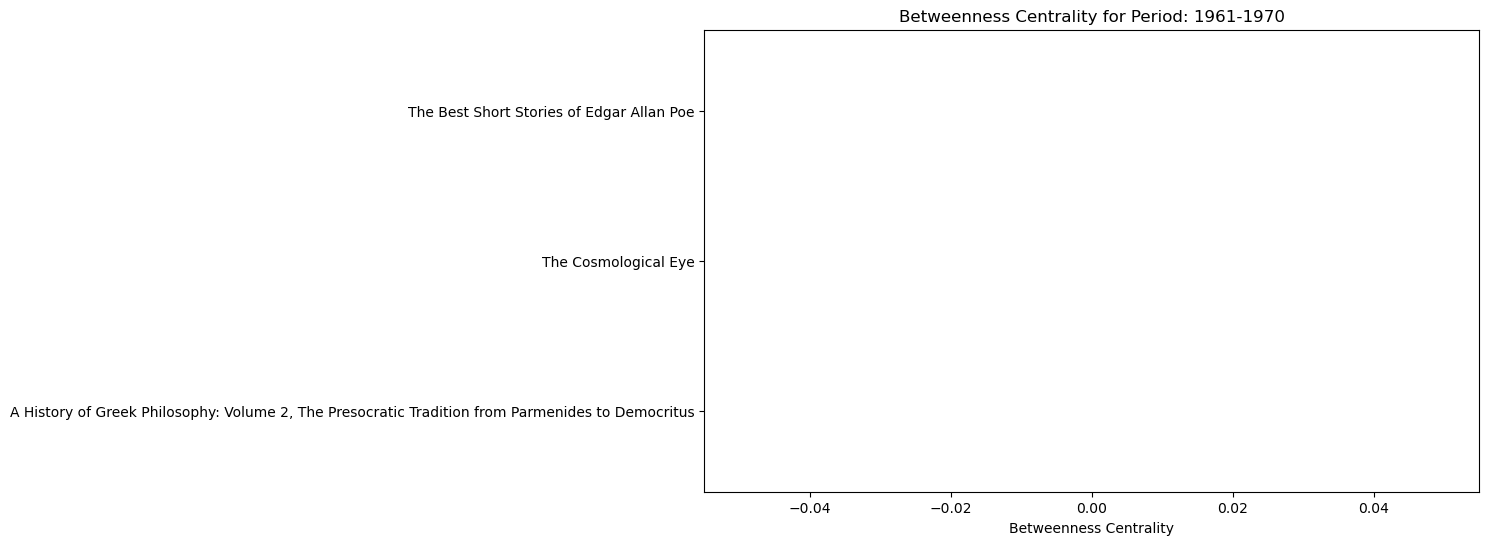

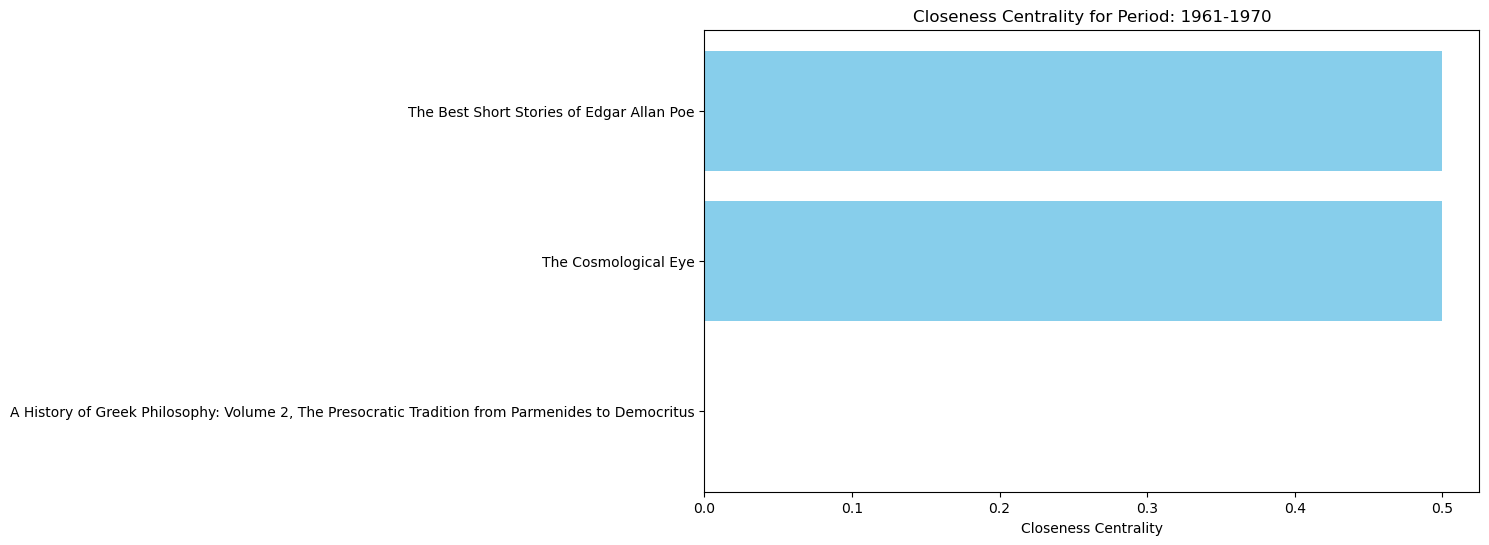

Analysis for Period: 1961-1970
Top 5 books by Degree Centrality:
[('The Cosmological Eye', 1.5), ('The Best Short Stories of Edgar Allan Poe', 0.5), ('A History of Greek Philosophy: Volume 2, The Presocratic Tradition from Parmenides to Democritus', 0.0)]
Top 5 books by Betweenness Centrality:
[('The Best Short Stories of Edgar Allan Poe', 0.0), ('The Cosmological Eye', 0.0), ('A History of Greek Philosophy: Volume 2, The Presocratic Tradition from Parmenides to Democritus', 0.0)]
Top 5 books by Closeness Centrality:
[('The Best Short Stories of Edgar Allan Poe', 0.5), ('The Cosmological Eye', 0.5), ('A History of Greek Philosophy: Volume 2, The Presocratic Tradition from Parmenides to Democritus', 0.0)]


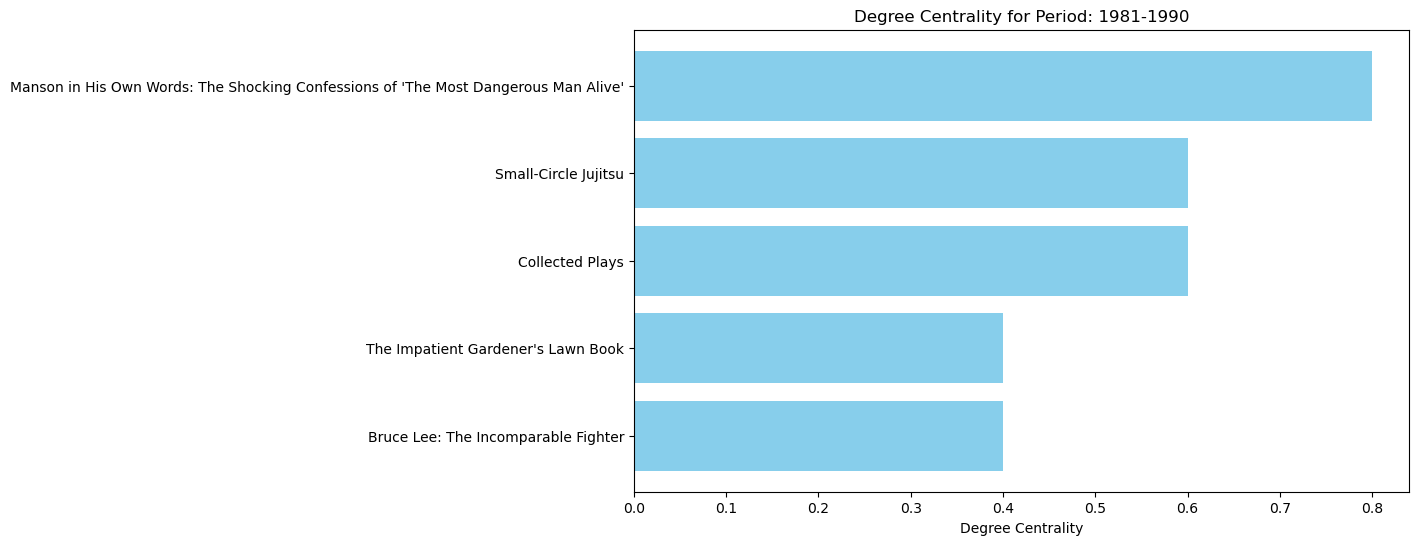

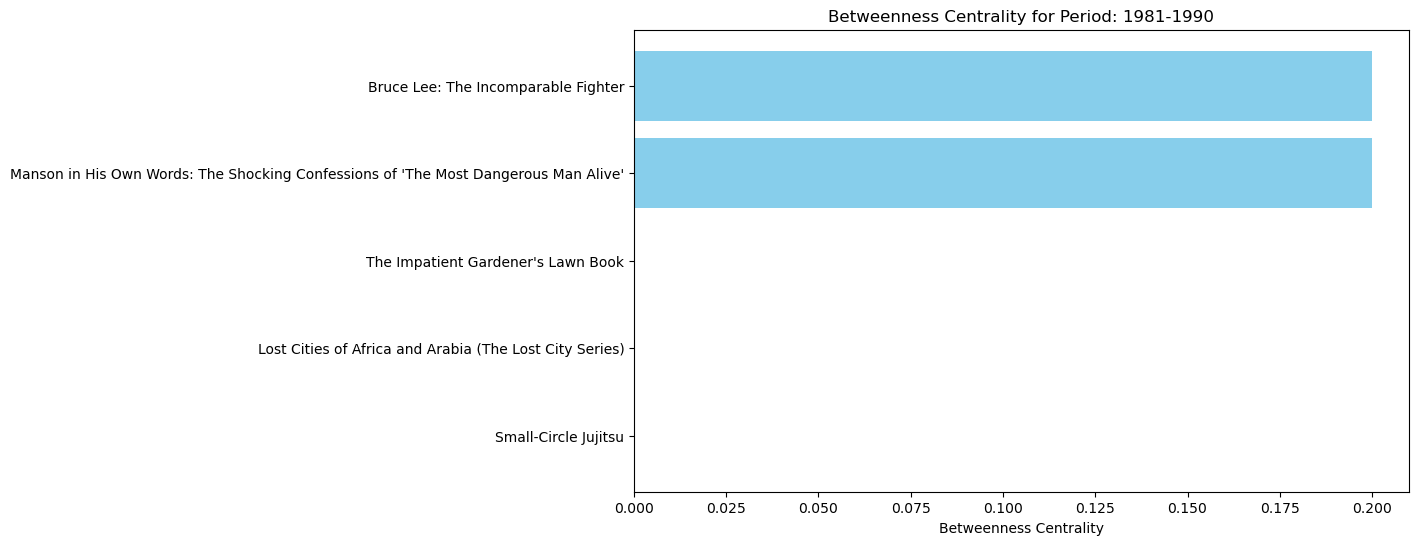

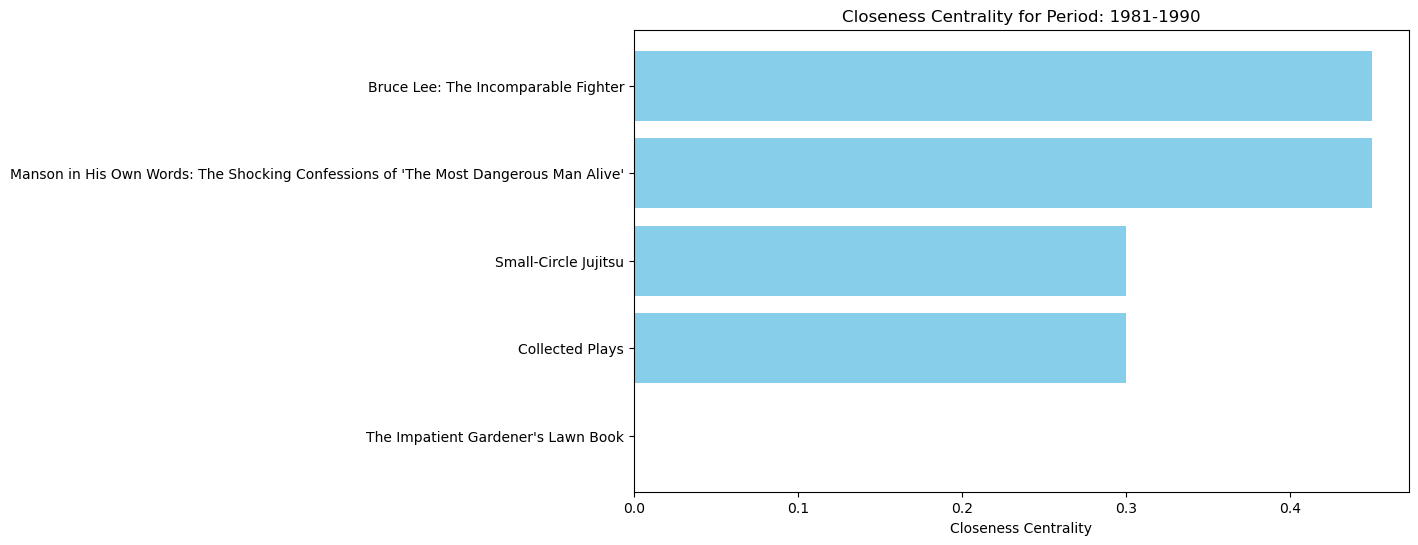

Analysis for Period: 1981-1990
Top 5 books by Degree Centrality:
[("Manson in His Own Words: The Shocking Confessions of 'The Most Dangerous Man Alive'", 0.8), ('Small-Circle Jujitsu', 0.6000000000000001), ('Collected Plays', 0.6000000000000001), ("The Impatient Gardener's Lawn Book", 0.4), ('Bruce Lee: The Incomparable Fighter', 0.4)]
Top 5 books by Betweenness Centrality:
[('Bruce Lee: The Incomparable Fighter', 0.2), ("Manson in His Own Words: The Shocking Confessions of 'The Most Dangerous Man Alive'", 0.2), ("The Impatient Gardener's Lawn Book", 0.0), ('Lost Cities of Africa and Arabia (The Lost City Series)', 0.0), ('Small-Circle Jujitsu', 0.0)]
Top 5 books by Closeness Centrality:
[('Bruce Lee: The Incomparable Fighter', 0.44999999999999996), ("Manson in His Own Words: The Shocking Confessions of 'The Most Dangerous Man Alive'", 0.44999999999999996), ('Small-Circle Jujitsu', 0.3), ('Collected Plays', 0.3), ("The Impatient Gardener's Lawn Book", 0.0)]


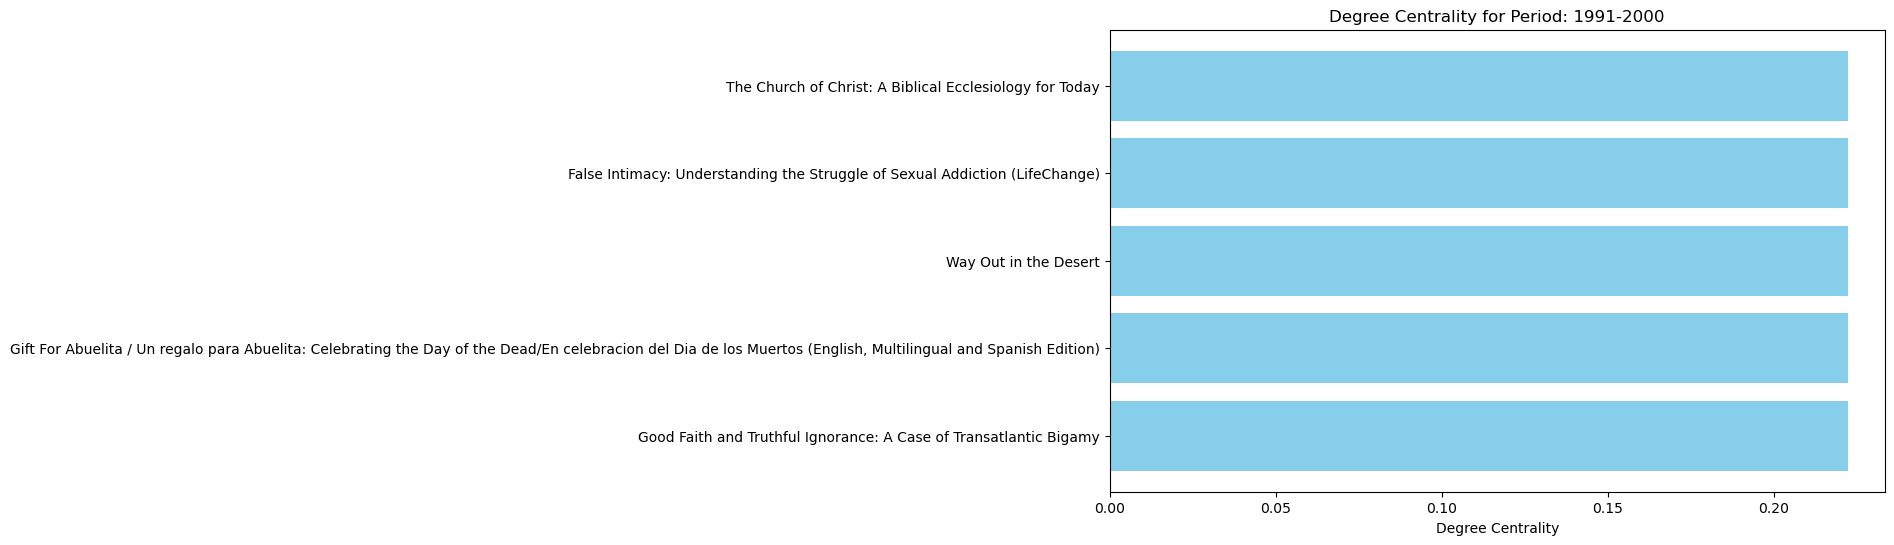

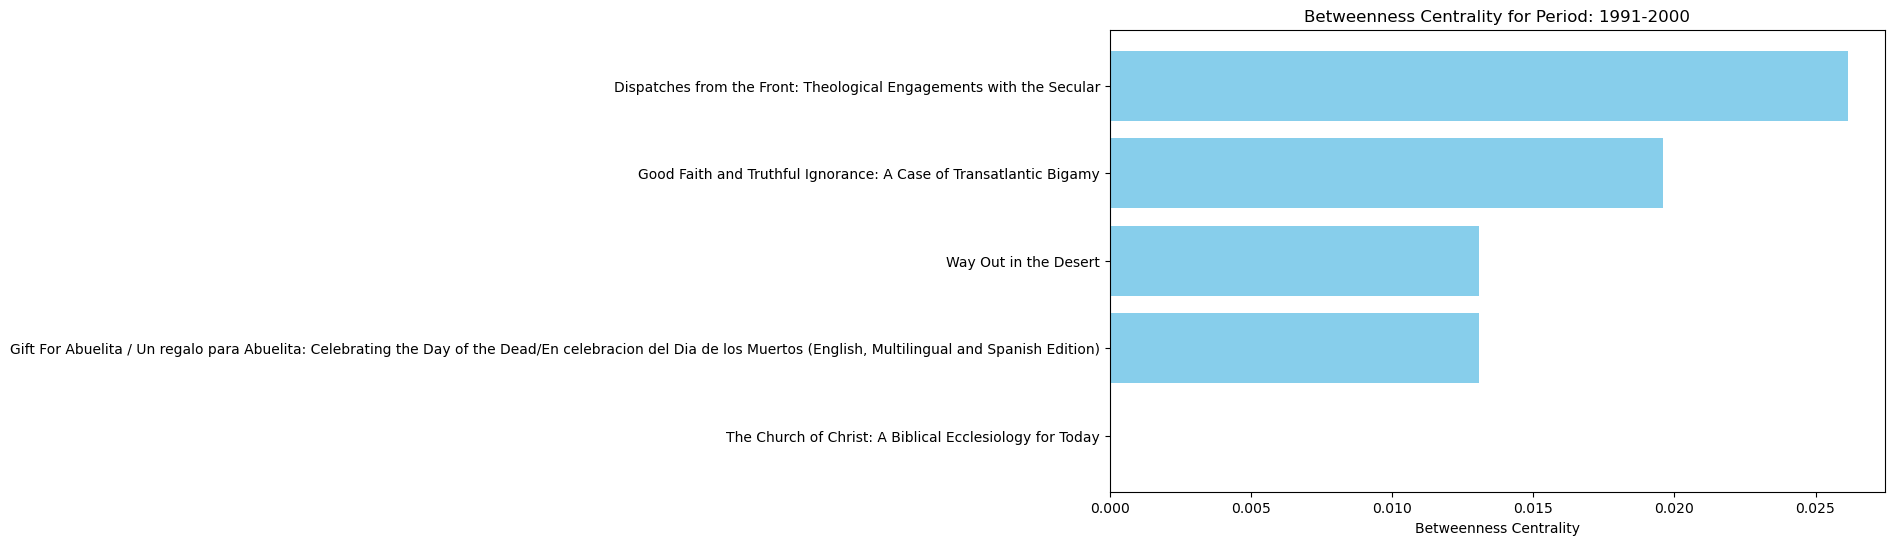

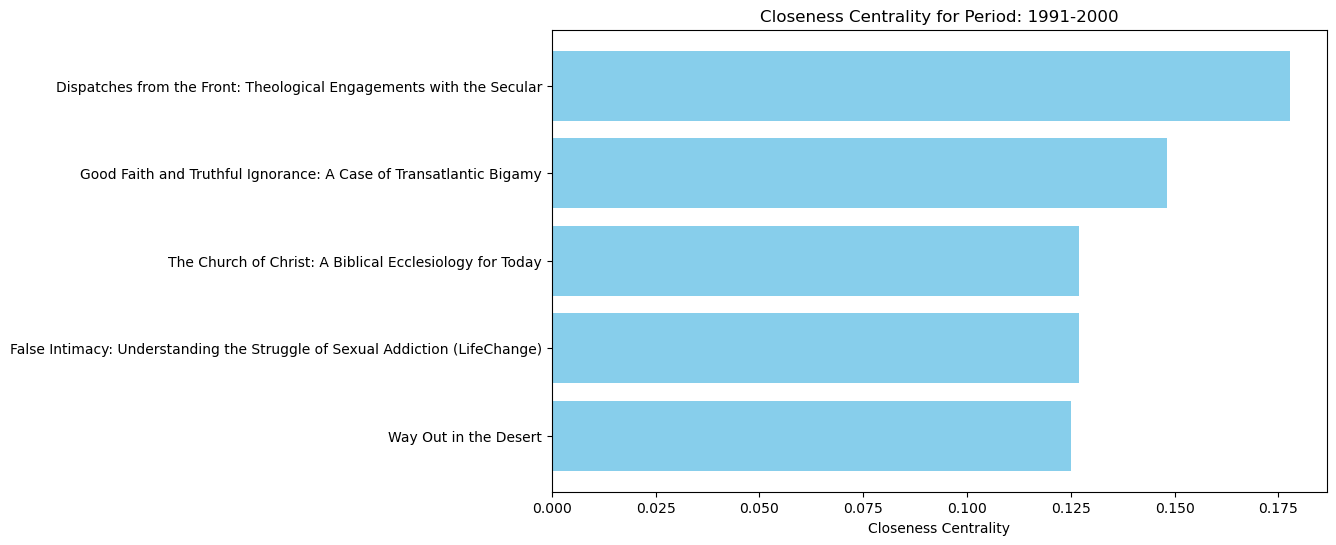

Analysis for Period: 1991-2000
Top 5 books by Degree Centrality:
[('The Church of Christ: A Biblical Ecclesiology for Today', 0.2222222222222222), ('False Intimacy: Understanding the Struggle of Sexual Addiction (LifeChange)', 0.2222222222222222), ('Way Out in the Desert', 0.2222222222222222), ('Gift For Abuelita / Un regalo para Abuelita: Celebrating the Day of the Dead/En celebracion del Dia de los Muertos (English, Multilingual and Spanish Edition)', 0.2222222222222222), ('Good Faith and Truthful Ignorance: A Case of Transatlantic Bigamy', 0.2222222222222222)]
Top 5 books by Betweenness Centrality:
[('Dispatches from the Front: Theological Engagements with the Secular', 0.026143790849673203), ('Good Faith and Truthful Ignorance: A Case of Transatlantic Bigamy', 0.0196078431372549), ('Way Out in the Desert', 0.013071895424836602), ('Gift For Abuelita / Un regalo para Abuelita: Celebrating the Day of the Dead/En celebracion del Dia de los Muertos (English, Multilingual and Spanish Edi

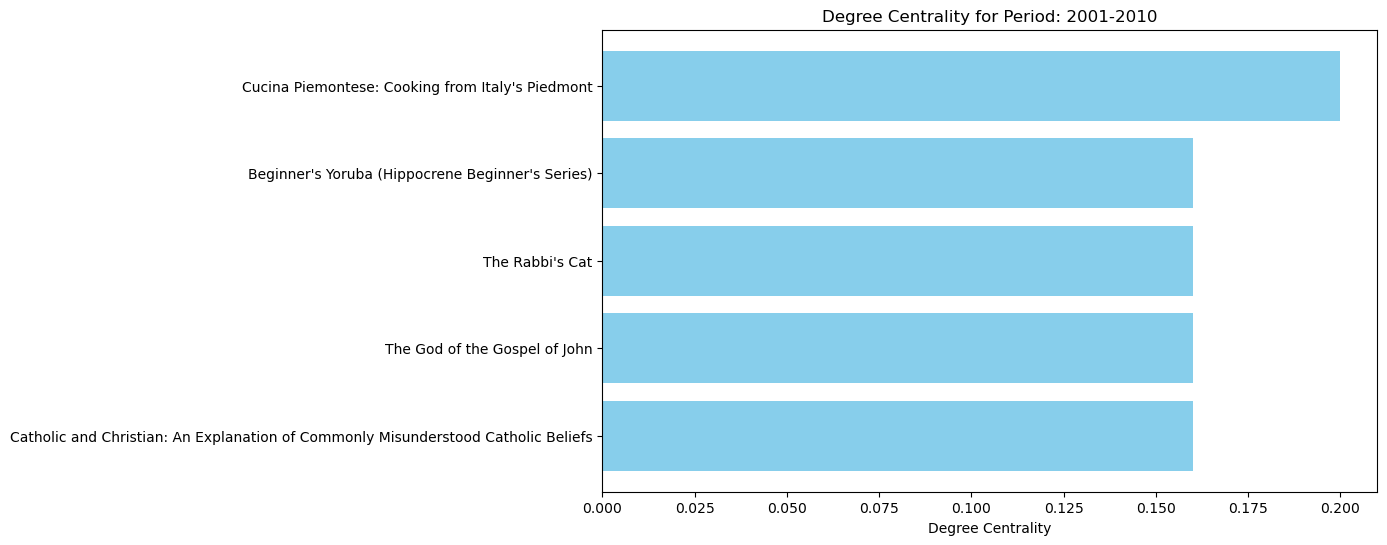

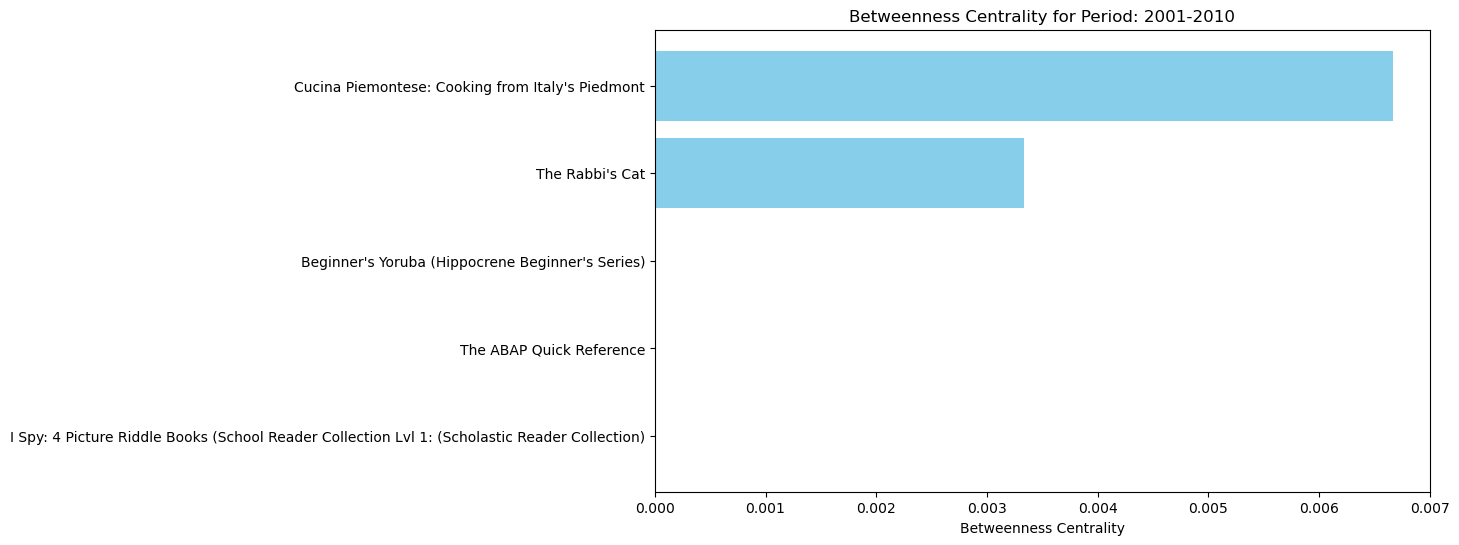

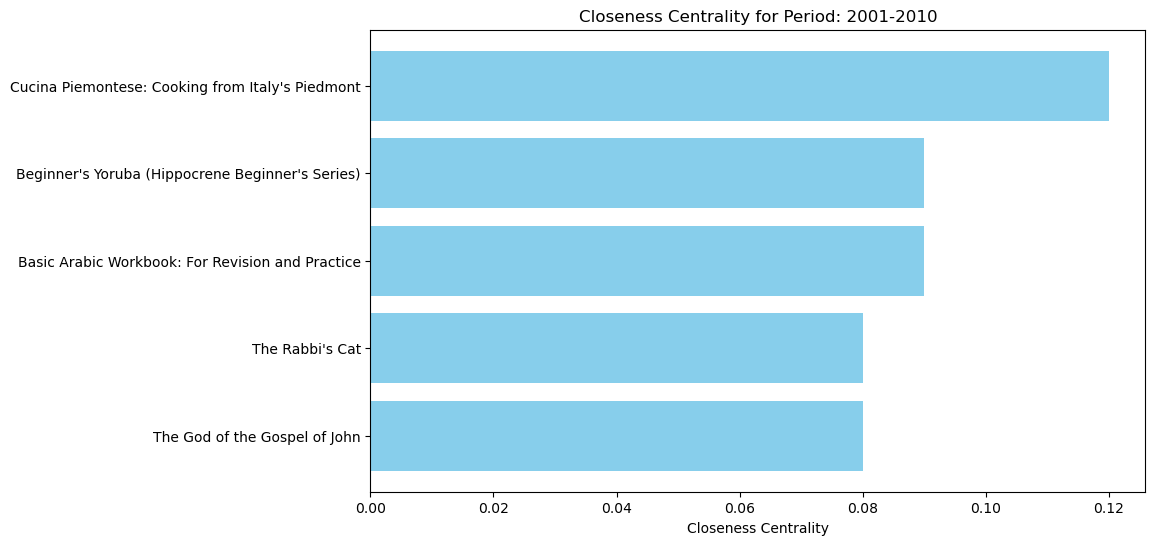

Analysis for Period: 2001-2010
Top 5 books by Degree Centrality:
[("Cucina Piemontese: Cooking from Italy's Piedmont", 0.2), ("Beginner's Yoruba (Hippocrene Beginner's Series)", 0.16), ("The Rabbi's Cat", 0.16), ('The God of the Gospel of John', 0.16), ('Catholic and Christian: An Explanation of Commonly Misunderstood Catholic Beliefs', 0.16)]
Top 5 books by Betweenness Centrality:
[("Cucina Piemontese: Cooking from Italy's Piedmont", 0.006666666666666667), ("The Rabbi's Cat", 0.0033333333333333335), ("Beginner's Yoruba (Hippocrene Beginner's Series)", 0.0), ('The ABAP Quick Reference', 0.0), ('I Spy: 4 Picture Riddle Books (School Reader Collection Lvl 1: (Scholastic Reader Collection)', 0.0)]
Top 5 books by Closeness Centrality:
[("Cucina Piemontese: Cooking from Italy's Piedmont", 0.12), ("Beginner's Yoruba (Hippocrene Beginner's Series)", 0.09), ('Basic Arabic Workbook: For Revision and Practice', 0.09), ("The Rabbi's Cat", 0.08), ('The God of the Gospel of John', 0.08)]
Girvan-New

In [ ]:
# Temporal Analysis and Centrality Visualization
time_periods = [(1961, 1970), (1981, 1990), (1991, 2000), (2001, 2010), (2011, 2013)]
# Convert 'publishedDate' to datetime format
merged_data['publishedDate'] = pd.to_datetime(merged_data['publishedDate'], errors='coerce')
# Function to plot centrality measures
def plot_centrality(title, centrality_data, centrality_type):
    labels, values = zip(*centrality_data)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel(centrality_type)
    plt.title(f'{centrality_type} for {title}')
    plt.gca().invert_yaxis()
    plt.show()

for start, end in time_periods:
    period_data = merged_data[(merged_data['publishedDate'].dt.year >= start) &
                              (merged_data['publishedDate'].dt.year <= end)]
    if period_data.empty:
        print(f"No data available for period {start}-{end}")
        continue

    period_G = nx.Graph()
    for index, row in period_data.iterrows():
        period_G.add_node(row['Title'], rating=row['review/score'])

    for feature in ['publisher', 'authors', 'categories']:
        for group_key, group in period_data.groupby(feature):
            titles = group['Title'].values
            for i in range(len(titles)):
                for j in range(i + 1, len(titles)):
                    period_G.add_edge(titles[i], titles[j], weight=1)

    # Apply Girvan-Newman algorithm
    period_comp = nx.community.girvan_newman(period_G)
    try:
        period_top_level_communities = next(period_comp)
    except StopIteration:
        print(f"Girvan-Newman failed to detect communities in period {start}-{end}")
        continue

    # Centrality Measures
    period_degree_centrality = nx.degree_centrality(period_G)
    period_betweenness_centrality = nx.betweenness_centrality(period_G)
    period_closeness_centrality = nx.closeness_centrality(period_G)

    # Plotting centrality measures for the current period
    period_title = f"Period: {start}-{end}"

    plot_centrality(period_title, sorted(period_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5], "Degree Centrality")
    plot_centrality(period_title, sorted(period_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5], "Betweenness Centrality")
    plot_centrality(period_title, sorted(period_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5], "Closeness Centrality")

    print(f"Analysis for {period_title}")
    print("Top 5 books by Degree Centrality:")
    print(sorted(period_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    print("Top 5 books by Betweenness Centrality:")
    print(sorted(period_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    print("Top 5 books by Closeness Centrality:")
    print(sorted(period_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])